# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

In this project, we will try to scrape the transaction volume from one of the most well-known cryptocurrencies, namely Ethereum. Transaction volume data will be taken from the Coingecko website for two months.

As additional information, at its core, Ethereum is a decentralized global software platform powered by blockchain technology. It is most commonly known for its native cryptocurrency, ether, or ETH. Ethereum can be used by anyone to create any secured digital technology. It has a token designed for use in the blockchain network, but it can also be used by participants as a method to pay for work done on the blockchain.

We will use the data to create a forcasting model with the aim of predicting the volume of Ethereum transactions in the future

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [18]:
import requests

url = 'https://www.coingecko.com/en/coins/ethereum/historical_data/?start_date=2020-01-01&end_date=2021-06-30' 
url_get = requests.get(url, headers = { 'User-Agent': 'Popular browser\'s user-agent', })

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [19]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [20]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

In [21]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [28]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js">
  </script>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
   <title>
    Ethereum USD Historical Data | CoinGecko
   </title>
   <meta content="Get Ethereum (ETH) USD historical prices." name="description">
    <script>
     (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(win

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [111]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:1500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="text-center">
    $27,149,143,847
   </td>
   <td class="text-center">
    $2,169.40
   </td>
   <td class="text-center">
    N/A
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-29
   </th>
   <td class="text-center">
    $243,040,539,437
   </td>
   <td class="text-center">
    $30,629,329,806
   </td>
   <td class="text-center">
    $2,087.52
   </td>
   <td class="text-center">
    $2,169.40
   </td>
  </tr>
  <tr>
   <th class="font-semibold text-center

Finding row length.

In [46]:
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

60

**The number of rows of data that we take is 60 rows**

Do the scrapping process here (please change this markdown with your explanation)

In [193]:
#scrapping process

temp = [] #initiating a tuple
# get date
for i in range(1, row_length):
    date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
    temp.append(date)

vol = [] # initiating a tuple
# get volume
code = table.find_all('td', attrs={'class':'text-center'})
jump = row_length * 4
for i in range(2,jump,4):
    vol.append(code[:i][i-1].text)    

data_tuples = list(zip(temp,vol))
data_tuples

[('2021-06-29', '\n $27,149,143,847\n'),
 ('2021-06-28', '\n$30,629,329,806\n'),
 ('2021-06-27', '\n$24,316,408,028\n'),
 ('2021-06-26', '\n$24,249,510,321\n'),
 ('2021-06-25', '\n$25,981,381,067\n'),
 ('2021-06-24', '\n$22,447,489,242\n'),
 ('2021-06-23', '\n$28,098,744,045\n'),
 ('2021-06-22', '\n$38,755,019,937\n'),
 ('2021-06-21', '\n$39,499,960,408\n'),
 ('2021-06-20', '\n$26,235,850,447\n'),
 ('2021-06-19', '\n$20,456,963,375\n'),
 ('2021-06-18', '\n$26,204,484,921\n'),
 ('2021-06-17', '\n$25,708,624,827\n'),
 ('2021-06-16', '\n$26,150,320,395\n'),
 ('2021-06-15', '\n$26,803,957,680\n'),
 ('2021-06-14', '\n$28,128,172,338\n'),
 ('2021-06-13', '\n$29,382,118,964\n'),
 ('2021-06-12', '\n$28,235,882,062\n'),
 ('2021-06-11', '\n$26,751,786,966\n'),
 ('2021-06-10', '\n$33,075,957,437\n'),
 ('2021-06-09', '\n$43,973,432,438\n'),
 ('2021-06-08', '\n$48,344,195,674\n'),
 ('2021-06-07', '\n$37,385,872,210\n'),
 ('2021-06-06', '\n$29,050,162,249\n'),
 ('2021-06-05', '\n$34,731,979,705\n'),

In [194]:
data_tuples = data_tuples[::-1]
data_tuples

[('2021-05-02', '\n$35,727,432,416\n'),
 ('2021-05-03', '\n$64,192,650,586\n'),
 ('2021-05-04', '\n$78,437,235,046\n'),
 ('2021-05-05', '\n$63,552,342,594\n'),
 ('2021-05-06', '\n$50,430,169,753\n'),
 ('2021-05-07', '\n$44,980,768,421\n'),
 ('2021-05-08', '\n$60,174,921,874\n'),
 ('2021-05-09', '\n$61,625,657,297\n'),
 ('2021-05-10', '\n$80,827,215,918\n'),
 ('2021-05-11', '\n$67,869,198,116\n'),
 ('2021-05-12', '\n$78,772,032,255\n'),
 ('2021-05-13', '\n$97,383,442,023\n'),
 ('2021-05-14', '\n$63,587,729,060\n'),
 ('2021-05-15', '\n$58,150,860,876\n'),
 ('2021-05-16', '\n$67,531,308,124\n'),
 ('2021-05-17', '\n$75,100,584,776\n'),
 ('2021-05-18', '\n$59,160,464,538\n'),
 ('2021-05-19', '\n$117,905,041,184\n'),
 ('2021-05-20', '\n$92,538,167,828\n'),
 ('2021-05-21', '\n$115,000,901,892\n'),
 ('2021-05-22', '\n$102,524,751,568\n'),
 ('2021-05-23', '\n$77,839,858,614\n'),
 ('2021-05-24', '\n$73,496,058,831\n'),
 ('2021-05-25', '\n$92,468,701,274\n'),
 ('2021-05-26', '\n$53,115,222,705\n'

## Creating data frame & Data wrangling

Put the array into dataframe

In [259]:
import pandas as pd

df = pd.DataFrame(data_tuples, columns = ('Date','Volume'))
df.head()

,Date,Volume
0,2021-05-02,"\n$35,727,432,416\n"
1,2021-05-03,"\n$64,192,650,586\n"
2,2021-05-04,"\n$78,437,235,046\n"
3,2021-05-05,"\n$63,552,342,594\n"
4,2021-05-06,"\n$50,430,169,753\n"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [260]:
import re
# We should remove special character from data Volume
df['Volume'] = df['Volume'].map(lambda x: re.sub(r'\W+', '', x))
df['Volume'] = df['Volume'].str.replace(",","") # remove comma
df['Volume'] = df['Volume'].str.replace("\n","") # remove another not omportant character
df['Volume'] = df['Volume'].str.strip() # remove whitespace

df.tail()

,Date,Volume
54,2021-06-25,25981381067
55,2021-06-26,24249510321
56,2021-06-27,24316408028
57,2021-06-28,30629329806
58,2021-06-29,27149143847


**Our data is clean and ready to be given the appropriate data type**

In [261]:
df['Volume'] = df['Volume'].astype('int64') # integer to volume
df["Date"] = pd.to_datetime(df["Date"]) # datetime to date
df.dtypes

Date      datetime64[ns]
Volume             int64
dtype: object

Data visualisation

To make our plot behave like we want, we need to set our index of our dataframe to our time coloumn. We can use set_index()

In [268]:
df = df.set_index('Date') # set Date become index

<AxesSubplot:xlabel='Date'>

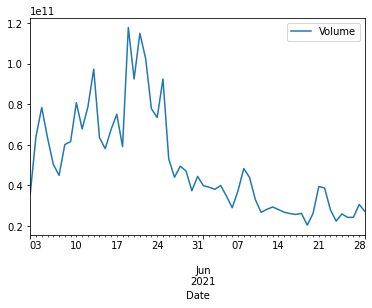

In [269]:
df.plot() # plot line chart

Plot that might be more pleasing to the eye :)

In [265]:
date = df["Date"]
value = df["Volume"]

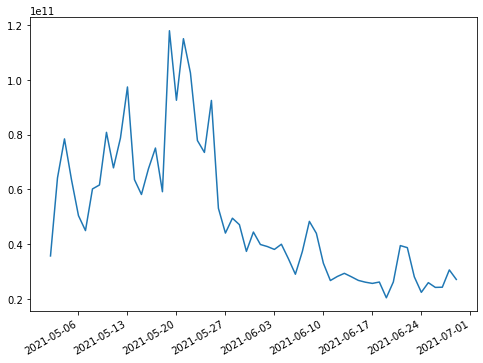

In [267]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(8, 6))

day_locator = mdates.DayLocator(interval=7)
year_month_formatter = mdates.DateFormatter("%Y-%m-%d") 

ax.xaxis.set_major_locator(day_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.plot(date, value)

# Rotates and right aligns the x labels. 
# Also moves the bottom of the axes up to make room for them.
fig.autofmt_xdate()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

**Based on the plot we have produced above. It can be concluded that Ethereum transaction volume during the last month dropped drastically from the previous month, this may be due to news that gave negative sentiment to the market.**

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.